# Machine Learning Lab 09 - Solutions

## Bayes Theorem

### Spam Scenario 1

P(SPAM|DETECTED) = (P(DETECTED|SPAM) * P(SPAM)) / P(DETECTED)

P(SPAM|DETECTED) = (0.99 * 0.02) / 0.02078

P(SPAM|DETECTED) = 0.9528

### Spam Scenario 2

P(not SPAM) = 1 - P(SPAM)
P(not SPAM) = 1 - 0.02
P(not SPAM) = 0.98

P(DETECTED) = P(DETECTED|SPAM) * P(SPAM) + P(DETECTED|not SPAM) * P(not SPAM)
P(DETECTED) = 0.99 * 0.02 + 0.001 * 0.98
P(DETECTED) = 0.0198 + 0.00098
P(DETECTED) = 0.02078


## Evaluating Performance

This example uses the wine dataset, comparing a DT and RF with default configs.

### Imports

In [4]:
# Data and Datasets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# Plotting & utils
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data analysis

In [5]:
# Loading the dataset from scikit-learn
dataset = pd.read_csv('heart-disease2.csv')
X = dataset.data
y = dataset.target
 
# Converting into a Pandas DataFrame
wine_df = pd.DataFrame(data= np.c_[X, y], columns= ['class'])
 
# Converting the target column to int (from float)
wine_df['target'] = pd.to_numeric(wine_df['target'], downcast='integer')
 
# Printing out the top 5 rows of the DataFrame
wine_df.head()

AttributeError: 'DataFrame' object has no attribute 'data'

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

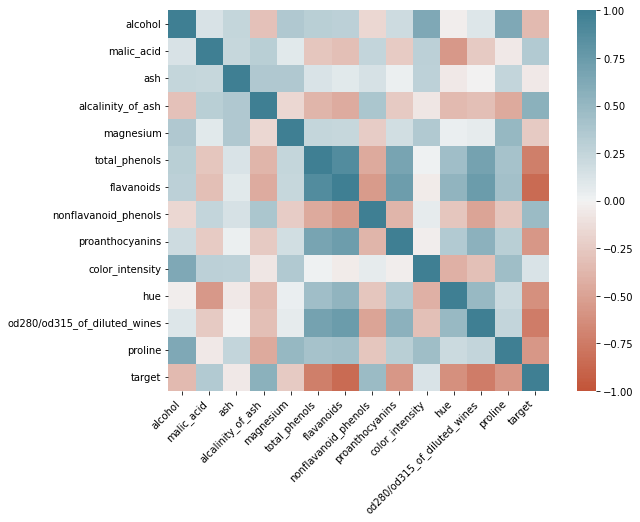

In [3]:
# Using Sparman's (non-linear relationship) - doesn't assume normal distribution
corr = wine_df.corr(method='spearman')

plt.figure()
plt.figure(figsize=(10, 7))

# Correlation matrix - customisations
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax

### Which Naive Bayes?!

Before applying NaiveBayes, you should know the feature types, their distribution and how they are correlated (to inform which type pf NaiveBayes, if any, to apply to the dataset).

But, just because we can, let's compare a few:
* GaussianNB
* MultinomialNB
* BernoulliNB

The two latter ones should not work well on this data set - at all... Why? 

The Multinominal distribution is discrete. So this would be for categorical features..

The Bernoulli distribution is binary. It's a ``0`` or ``1``, a ``heads`` or ``tails`` of a coin flip, a ``true`` or ``false``..


In [4]:
gaussian_accuracy = np.array([])
muiltinomial_accuracy = np.array([])
bernoulli_accuracy = np.array([])
num_runs = 100

print("Starting",num_runs,"runs")
for x in range(num_runs):
    
    # splitting the dataset each run, just to get more variation in the results for this example
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, stratify=dataset.target)
    
    # Gaussian NB
    gaussianNB = GaussianNB()
    gaussianNB = gaussianNB.fit(X_train,y_train)
    y_pred = gaussianNB.predict(X_test)
    gaussian_accuracy = np.append(gaussian_accuracy, metrics.accuracy_score(y_test, y_pred))
    
    # Multinomial NB
    multinomialNB = MultinomialNB()
    multinomialNB = multinomialNB.fit(X_train,y_train)
    y_pred = multinomialNB.predict(X_test)
    muiltinomial_accuracy = np.append(muiltinomial_accuracy, metrics.accuracy_score(y_test, y_pred))
    
    # Bernoulli NB
    bernoulliNB = BernoulliNB()
    bernoulliNB = bernoulliNB.fit(X_train,y_train)
    y_pred = bernoulliNB.predict(X_test)
    bernoulli_accuracy = np.append(bernoulli_accuracy, metrics.accuracy_score(y_test, y_pred))

print("Done...")
print(" - Gaussian accuracy:    %0.2f (+/- %0.2f)" % (gaussian_accuracy.mean(), gaussian_accuracy.std() * 2))
print(" - Multinomial accuracy: %0.2f (+/- %0.2f)" % (muiltinomial_accuracy.mean(), muiltinomial_accuracy.std() * 2))
print(" - Bernoulli accuracy:   %0.2f (+/- %0.2f)" % (bernoulli_accuracy.mean(), bernoulli_accuracy.std() * 2))


Starting 100 runs
Done...
 - Gaussian accuracy:    0.97 (+/- 0.04)
 - Multinomial accuracy: 0.84 (+/- 0.12)
 - Bernoulli accuracy:   0.39 (+/- 0.00)


### DT vs RF vs NB

From the three naive Bayes models, above, we're proceeding with the Gaussian version here :)

In [5]:
dt_accuracy = np.array([])
rf_accuracy = np.array([])
nb_accuracy = np.array([])
num_runs = 100

# train and test the DT and RF 1k times and saving the accuracy into the above lists
# PS: you should also capture other metrics for your assignment...
print("Starting",num_runs,"runs")
for x in range(num_runs):
    
    # splitting the dataset each run, just to get more variation in the results for this example
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, stratify=dataset.target)
    
    # DT with default config
    dt = DecisionTreeClassifier(random_state=None)
    dt = dt.fit(X_train,y_train)
    y_pred = dt.predict(X_test)
    dt_accuracy = np.append(dt_accuracy, metrics.accuracy_score(y_test, y_pred))
    
    # Random Forest with 10 trees (and keeping other config as per default values)
    rf = RandomForestClassifier(random_state=None)
    rf = rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    rf_accuracy = np.append(rf_accuracy, metrics.accuracy_score(y_test, y_pred))
    
    # Gaussian NB
    gaussianNB = GaussianNB() # Note that Naive Bayes doesn't have the 'random_state' argument
    gaussianNB = gaussianNB.fit(X_train,y_train)
    y_pred = gaussianNB.predict(X_test)
    nb_accuracy = np.append(nb_accuracy, metrics.accuracy_score(y_test, y_pred))

print("Done...")
print(" - DT accuracy: %0.2f (+/- %0.2f)" % (dt_accuracy.mean(), dt_accuracy.std() * 2))
print(" - RF accuracy: %0.2f (+/- %0.2f)" % (rf_accuracy.mean(), rf_accuracy.std() * 2))
print(" - NB accuracy: %0.2f (+/- %0.2f)" % (nb_accuracy.mean(), nb_accuracy.std() * 2))

Starting 100 runs
Done...
 - DT accuracy: 0.91 (+/- 0.09)
 - RF accuracy: 0.98 (+/- 0.04)
 - NB accuracy: 0.98 (+/- 0.05)


### Plotting accuracy distributions

Text(0.5, 1.0, 'Naive Bayes')

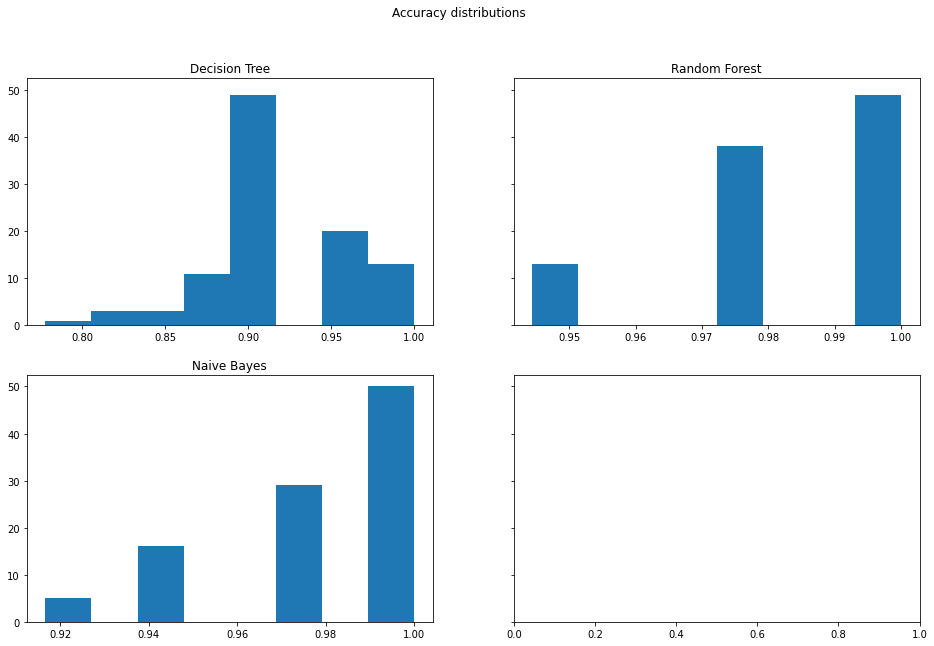

In [6]:
# Setting up figure with two sub-plots to show the distribution of the DT and RF results (accuracy)
fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharey=True)
fig.suptitle('Accuracy distributions')

num_bins = 8

# Adding figure for DT
axs[0][0].hist(dt_accuracy, num_bins)
axs[0][0].set_title('Decision Tree')

# Adding figure for RF
axs[0][1].hist(rf_accuracy, num_binsplt.figure(figsize=(10, 7));)
axs[0][1].set_title('Random Forest')

# Adding figure for NB
axs[1][0].hist(nb_accuracy, num_bins)
axs[1][0].set_title('Naive Bayes')

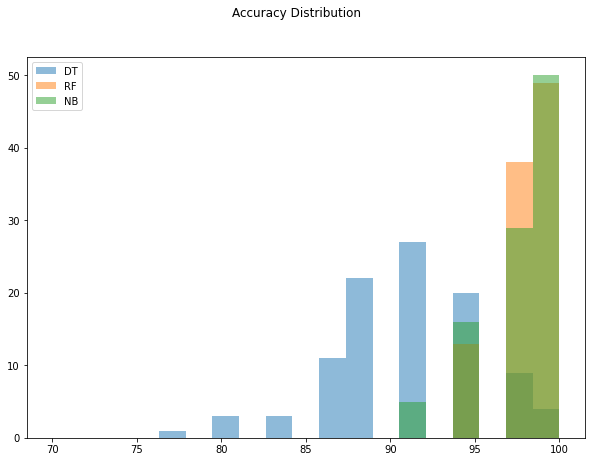

In [33]:
plt.figure(figsize=(10, 7))
plt.suptitle('Accuracy Distribution')
bins = np.linspace(70, 100, 20)

plt.hist(dt_accuracy*100, bins, alpha=0.5, label='DT')
plt.hist(rf_accuracy*100, bins, alpha=0.5, label='RF')
plt.hist(nb_accuracy*100, bins, alpha=0.5, label='NB')

plt.legend(loc='upper left')
plt.show()

### Checking for normality

In [7]:
# Checking for normality and statistical significance
# If the p value >= alpha, then normal.
# Alpha value of 0.05 is common.
from scipy.stats import shapiro     # Shapiro Wilk
from scipy.stats import normaltest  # D’Agostino’s K^2
from scipy.stats import anderson    # Anderson-Darling

a = 0.05

print("DT normality tests")
stat, p = shapiro(dt_accuracy)
print(' * Shapiro:    W = %0.2f, p-value = %0.2f' % (stat, p))
if (p >= a):
    print("   - Looks NORMAL!")
else:
    print("   - Doesn't look normal :(")
stat, p = normaltest(dt_accuracy)
print(' * D’Agostino: W = %0.2f, p-value = %0.2f' % (stat, p))
if (p >= a):
    print("   - Looks NORMAL!")
else:
    print("   - Doesn't look normal :(")

print()

print("RF normality tests")
stat, p = shapiro(rf_accuracy)
print(' * Shapiro:    W = %0.2f, p-value = %0.2f' % (stat, p))
if (p >= a):
    print("   - Looks NORMAL!")
else:
    print("   - Doesn't look normal :(")
stat, p = normaltest(rf_accuracy)
print(' * D’Agostino: W = %0.2f, p-value = %0.2f' % (stat, p))
if (p >= a):
    print("   - Looks NORMAL!")
else:
    print("   - Doesn't look normal :(")

print()

print("NB normality tests")
stat, p = shapiro(nb_accuracy)
print(' * Shapiro:    W = %0.2f, p-value = %0.2f' % (stat, p))
if (p >= a):
    print("   - Looks NORMAL!")
else:
    print("   - Doesn't look normal :(")
stat, p = normaltest(nb_accuracy)
print(' * D’Agostino: W = %0.2f, p-value = %0.2f' % (stat, p))
if (p >= a):
    print("   - Looks NORMAL!")
else:
    print("   - Doesn't look normal :(")

# and another one, but just for NB
result = anderson(nb_accuracy)
print(' * Anderson-Darling statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('    %.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('    %.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))


DT normality tests
 * Shapiro:    W = 0.95, p-value = 0.00
   - Doesn't look normal :(
 * D’Agostino: W = 3.48, p-value = 0.18
   - Looks NORMAL!

RF normality tests
 * Shapiro:    W = 0.76, p-value = 0.00
   - Doesn't look normal :(
 * D’Agostino: W = 11.90, p-value = 0.00
   - Doesn't look normal :(

NB normality tests
 * Shapiro:    W = 0.78, p-value = 0.00
   - Doesn't look normal :(
 * D’Agostino: W = 12.08, p-value = 0.00
   - Doesn't look normal :(
 * Anderson-Darling statistic: 8.986
    15.000: 0.555, data does not look normal (reject H0)
    10.000: 0.632, data does not look normal (reject H0)
    5.000: 0.759, data does not look normal (reject H0)
    2.500: 0.885, data does not look normal (reject H0)
    1.000: 1.053, data does not look normal (reject H0)


### Checking for statistical significance

#### DT vs RF

In [8]:
# In my tests, the above results do not seem to be normally distributed, 
# so the Student T-Test would only be vaguely reliable with a very large sample size.
# Better still, we need to consider using another significance test that doesn't assume normality
# See, e.g., https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

from scipy.stats import ttest_ind    # independent student t-test; assumes normality
from scipy.stats import mannwhitneyu # non-parametric; doesn't assume normality

stat, p = ttest_ind(dt_accuracy, rf_accuracy)
print('T-Test: stat = %0.2f, p-value = %f' % (stat, p))
if p < 0.05:
    print(" - The performance difference appears significant")
else:
    print(" - The performance difference is NOT significant")

stat, p = mannwhitneyu(dt_accuracy, rf_accuracy)
print('\nMann-Whitney U: stat = %0.2f, p-value = %f' % (stat, p))
if p < 0.05:
    print(" - The performance difference appears significant")
else:
    print(" - The performance difference is NOT significant")

T-Test: stat = -14.63, p-value = 0.000000
 - The performance difference appears significant

Mann-Whitney U: stat = 720.00, p-value = 0.000000
 - The performance difference appears significant


#### RF vs NB

In [9]:
# In my tests, the above results do not seem to be normally distributed, 
# so the Student T-Test would only be vaguely reliable with a very large sample size.
# Better still, we need to consider using another significance test that doesn't assume normality
# See, e.g., https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

from scipy.stats import ttest_ind    # independent student t-test; assumes normality
from scipy.stats import mannwhitneyu # non-parametric; doesn't assume normality

stat, p = ttest_ind(nb_accuracy, rf_accuracy)
print('T-Test: stat = %0.2f, p-value = %f' % (stat, p))
if p < 0.05:
    print(" - The performance difference appears significant")
else:
    print(" - The performance difference is NOT significant")

stat, p = mannwhitneyu(nb_accuracy, rf_accuracy)
print('\nMann-Whitney U: stat = %0.2f, p-value = %f' % (stat, p))
if p < 0.05:
    print(" - The performance difference appears significant")
else:
    print(" - The performance difference is NOT significant")

T-Test: stat = -1.05, p-value = 0.294949
 - The performance difference is NOT significant

Mann-Whitney U: stat = 4807.00, p-value = 0.607402
 - The performance difference is NOT significant
